# **Import library**

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from PIL import Image
from wordcloud.wordcloud import STOPWORDS
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


# **Read in dataset by pointing Pandas to the right location of the csv file**

In [ ]:
%cd "/content/drive/My Drive/colab"

/content/drive/My Drive/colab


In [ ]:
df = pd.read_csv('agingbotox.csv')
df_agingwithbotox_tweet = df
df_agingwithbotox_tweet

,Unnamed: 0,Date,TweetURL,User,Source,verified,Location,Tweet,Likes_Count,Retweet_Count,Quote_Count,Reply_Count
0,0,2022-11-26 23:03:57+00:00,https://twitter.com/BeautiqueMedSpa/status/159...,BeautiqueMedSpa,Crystal Clear DM SPC,False,"Knoxville, Tennessee",Frustrated with #CrowsFeet or #FrownLines? #Bo...,0,0,0,0
1,1,2022-11-26 21:05:00+00:00,https://twitter.com/DavidHalpernMD/status/1596...,DavidHalpernMD,Crystal Clear DM SPC,False,"Tampa, FL",Turn back the clock on aging with #Botox. Book...,2,0,0,0
2,2,2022-11-26 19:06:54+00:00,https://twitter.com/BeautiqueMedSpa/status/159...,BeautiqueMedSpa,Crystal Clear DM SPC,False,"Knoxville, Tennessee",Making facial expressions can cause #DynamicWr...,0,0,0,0
3,3,2022-11-26 18:58:19+00:00,https://twitter.com/WASDTF2/status/15965791176...,WASDTF2,Twitter Web App,False,NaN,@elliemcp @IanRunkle Once you start going beyo...,0,0,0,0
4,4,2022-11-26 18:00:11+00:00,https://twitter.com/rarevmedspa/status/1596564...,rarevmedspa,SocialPost App,False,Las Vegas,BOTOX® and Dermal Fillers are two cosmetic tre...,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
40712,40712,2011-01-01 04:37:52+00:00,https://twitter.com/growing_young/status/21062...,growing_young,twitterfeed,False,NaN,Best Anti Aging Creams – 6 Reasons To Turn Awa...,0,0,0,0
40713,40713,2011-01-01 03:12:49+00:00,https://twitter.com/hayhers16/status/210411230...,hayhers16,twitterfeed,False,USA,Best Anti Aging Creams – 6 Reasons To Turn Awa...,0,0,0,0
40714,40714,2011-01-01 03:12:49+00:00,https://twitter.com/CASEBROOK/status/210411222...,CASEBROOK,twitterfeed,False,New York City!,Best Anti Aging Creams – 6 Reasons To Turn Awa...,0,0,0,0
40715,40715,2011-01-01 03:11:33+00:00,https://twitter.com/Mizz_Dallas/status/2104080...,Mizz_Dallas,Mobile Web,False,"Las Colonias, TX",@kacymocha you mean nicki fraud that's always ...,0,0,0,0


# The shape of the dataset

In [ ]:
#the shape is the number of rows and columns
df_agingwithbotox_tweet.shape

(40717, 12)

In [ ]:
#more information about each column on the dataset
df_agingwithbotox_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40717 entries, 0 to 40716
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     40717 non-null  int64 
 1   Date           40717 non-null  object
 2   TweetURL       40717 non-null  object
 3   User           40717 non-null  object
 4   Source         40717 non-null  object
 5   verified       40717 non-null  bool  
 6   Location       31646 non-null  object
 7   Tweet          40717 non-null  object
 8   Likes_Count    40717 non-null  int64 
 9   Retweet_Count  40717 non-null  int64 
 10  Quote_Count    40717 non-null  int64 
 11  Reply_Count    40717 non-null  int64 
dtypes: bool(1), int64(5), object(6)
memory usage: 3.5+ MB


# **Proceeding to clean the tweet by removing punctuations**

In [ ]:

import re
def clean_tweet(tweet):
  return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split())

In [ ]:
#getting column of clean tweet content
df_agingwithbotox_tweet['cleaned_tweet']=df_agingwithbotox_tweet['Tweet'].apply(clean_tweet)

In [ ]:
def clean_tweet(df):
  df_agingwithbotox_tweet['cleaned_tweet']=df_agingwithbotox_tweet.cleaned_tweet.str.replace('#','')
  df_agingwithbotox_tweet['cleaned_tweet']=df_agingwithbotox_tweet.cleaned_tweet.str.replace('_','')
  df_agingwithbotox_tweet['cleaned_tweet']=df_agingwithbotox_tweet.cleaned_tweet.str.replace('/','')
  df_agingwithbotox_tweet['cleaned_tweet']=df_agingwithbotox_tweet.cleaned_tweet.str.replace('\.','')
  df_agingwithbotox_tweet['cleaned_tweet']=df_agingwithbotox_tweet.cleaned_tweet.str.replace('RT','')
  df_agingwithbotox_tweet['cleaned_tweet']=df_agingwithbotox_tweet.cleaned_tweet.str.replace('*','')
  df_agingwithbotox_tweet['cleaned_tweet']=df_agingwithbotox_tweet.cleaned_tweet.str.replace('-','')
  df_agingwithbotox_tweet['cleaned_tweet']=df_agingwithbotox_tweet.cleaned_tweet.str.replace("'",'')
  df_agingwithbotox_tweet['cleaned_tweet']=df_agingwithbotox_tweet.cleaned_tweet.map(lambda x: x.lower())
clean_tweet(df_agingwithbotox_tweet)

In [ ]:
df_agingwithbotox_tweet.head()

,Unnamed: 0,Date,TweetURL,User,Source,verified,Location,Tweet,Likes_Count,Retweet_Count,Quote_Count,Reply_Count,cleaned_tweet
0,0,2022-11-26 23:03:57+00:00,https://twitter.com/BeautiqueMedSpa/status/159...,BeautiqueMedSpa,Crystal Clear DM SPC,False,"Knoxville, Tennessee",Frustrated with #CrowsFeet or #FrownLines? #Bo...,0,0,0,0,frustrated with crowsfeet or frownlines botox ...
1,1,2022-11-26 21:05:00+00:00,https://twitter.com/DavidHalpernMD/status/1596...,DavidHalpernMD,Crystal Clear DM SPC,False,"Tampa, FL",Turn back the clock on aging with #Botox. Book...,2,0,0,0,turn back the clock on aging with botox book y...
2,2,2022-11-26 19:06:54+00:00,https://twitter.com/BeautiqueMedSpa/status/159...,BeautiqueMedSpa,Crystal Clear DM SPC,False,"Knoxville, Tennessee",Making facial expressions can cause #DynamicWr...,0,0,0,0,making facial expressions can cause dynamicwri...
3,3,2022-11-26 18:58:19+00:00,https://twitter.com/WASDTF2/status/15965791176...,WASDTF2,Twitter Web App,False,NaN,@elliemcp @IanRunkle Once you start going beyo...,0,0,0,0,once you start going beyond the age of 55 thin...
4,4,2022-11-26 18:00:11+00:00,https://twitter.com/rarevmedspa/status/1596564...,rarevmedspa,SocialPost App,False,Las Vegas,BOTOX® and Dermal Fillers are two cosmetic tre...,0,0,0,0,botox and dermal fillers are two cosmetic trea...


In [ ]:
df_agingwithbotox_tweet.columns

Index(['Unnamed: 0', 'Date', 'TweetURL', 'User', 'Source', 'verified',
       'Location', 'Tweet', 'Likes_Count', 'Retweet_Count', 'Quote_Count',
       'Reply_Count', 'cleaned_tweet'],
      dtype='object')

# **Dropping the columns not needed**

In [ ]:
df.dropna(inplace=True)


In [ ]:
df.drop('Quote_Count', inplace=True, axis=1)
df.drop('Retweet_Count', inplace=True, axis=1)
df.drop('Reply_Count', inplace=True, axis=1)
df.drop('Likes_Count', inplace=True, axis=1)

# **Deriving tweets based on monthly and annualy**

In [ ]:
import calendar
df_agingwithbotox_tweet['year'] = pd.DatetimeIndex(df_agingwithbotox_tweet['Date']).year #adding year
df_agingwithbotox_tweet['month'] = pd.DatetimeIndex(df_agingwithbotox_tweet['Date']).month
df_agingwithbotox_tweet['month'] = df_agingwithbotox_tweet['month'].apply(lambda x: calendar.month_abbr[x])  #adding year


In [ ]:
df_agingwithbotox_tweet = df_agingwithbotox_tweet[['cleaned_tweet', 'Tweet', 'Date', 'verified', 'Location', 'year', 'month']]
df_agingwithbotox_tweet.head()

,cleaned_tweet,Tweet,Date,verified,Location,year,month
0,frustrated with crowsfeet or frownlines botox ...,Frustrated with #CrowsFeet or #FrownLines? #Bo...,2022-11-26 23:03:57+00:00,False,United States,2022,Nov
1,turn back the clock on aging with botox book y...,Turn back the clock on aging with #Botox. Book...,2022-11-26 21:05:00+00:00,False,"Tampa, FL",2022,Nov
2,making facial expressions can cause dynamicwri...,Making facial expressions can cause #DynamicWr...,2022-11-26 19:06:54+00:00,False,United States,2022,Nov
4,botox and dermal fillers are two cosmetic trea...,BOTOX® and Dermal Fillers are two cosmetic tre...,2022-11-26 18:00:11+00:00,False,Las Vegas,2022,Nov
6,did you know botox relaxes wrinkles,Did you know #Botox relaxes wrinkles? https://...,2022-11-26 13:03:04+00:00,False,United States,2022,Nov


# **Sentiment Analysis**
# Vader was applied for the sentiment analysis

In [ ]:
import nltk
nltk.download('vader_lexicon')#import vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df_agingwithbotox_tweet['vader_scores'] = df_agingwithbotox_tweet['cleaned_tweet'].apply(lambda review: sid.polarity_scores(review))#deriving vader scores per sentiment
df_agingwithbotox_tweet['compound']  = df_agingwithbotox_tweet['vader_scores'].apply(lambda score_dict: score_dict['compound'])#deriving compound scores
df_agingwithbotox_tweet['vader_sentiment'] = df_agingwithbotox_tweet['compound'].apply(lambda c: 'positive' if c >=0.5 else 'negative')#thresholds set to determine threshold

In [ ]:
#The cleaned_tweet column shows below that it has been cleaned as against the Tweet column
df_agingwithbotox_tweet = df_agingwithbotox_tweet[['cleaned_tweet','Tweet','Date','verified','Location','year','month','vader_sentiment']]
df_agingwithbotox_tweet

,cleaned_tweet,Tweet,Date,verified,Location,year,month,vader_sentiment
0,frustrated with crowsfeet or frownlines botox ...,Frustrated with #CrowsFeet or #FrownLines? #Bo...,2022-11-26 23:03:57+00:00,False,"Knoxville, Tennessee",2022,Nov,negative
1,turn back the clock on aging with botox book y...,Turn back the clock on aging with #Botox. Book...,2022-11-26 21:05:00+00:00,False,"Tampa, FL",2022,Nov,negative
2,making facial expressions can cause dynamicwri...,Making facial expressions can cause #DynamicWr...,2022-11-26 19:06:54+00:00,False,"Knoxville, Tennessee",2022,Nov,negative
4,botox and dermal fillers are two cosmetic trea...,BOTOX® and Dermal Fillers are two cosmetic tre...,2022-11-26 18:00:11+00:00,False,Las Vegas,2022,Nov,positive
6,did you know botox relaxes wrinkles,Did you know #Botox relaxes wrinkles? https://...,2022-11-26 13:03:04+00:00,False,"Knoxville, Tennessee",2022,Nov,negative
...,...,...,...,...,...,...,...,...
40706,botox and antiaging face creams,RT @alexjamison1: Botox and Anti-Aging Face Cr...,2011-01-01 08:37:58+00:00,False,nearest cinema,2011,Jan,negative
40710,botox and antiaging face creams,RT @alexjamison1: Botox and Anti-Aging Face Cr...,2011-01-01 07:32:07+00:00,False,"MI, USA",2011,Jan,negative
40713,best anti aging creams 6 reasons to turn away ...,Best Anti Aging Creams – 6 Reasons To Turn Awa...,2011-01-01 03:12:49+00:00,False,USA,2011,Jan,positive
40714,best anti aging creams 6 reasons to turn away ...,Best Anti Aging Creams – 6 Reasons To Turn Awa...,2011-01-01 03:12:49+00:00,False,New York City!,2011,Jan,positive


# **Add columns to the original DataFrame to store polarity score**


In [ ]:
df['scores'] = df['cleaned_tweet'].apply(lambda review: sid.polarity_scores(review))

df.head()


,Unnamed: 0,Date,TweetURL,User,Source,verified,Location,Tweet,cleaned_tweet,year,month,scores
0,0,2022-11-26 23:03:57+00:00,https://twitter.com/BeautiqueMedSpa/status/159...,BeautiqueMedSpa,Crystal Clear DM SPC,False,"Knoxville, Tennessee",Frustrated with #CrowsFeet or #FrownLines? #Bo...,frustrated with crowsfeet or frownlines botox ...,2022,Nov,"{'neg': 0.274, 'neu': 0.726, 'pos': 0.0, 'comp..."
1,1,2022-11-26 21:05:00+00:00,https://twitter.com/DavidHalpernMD/status/1596...,DavidHalpernMD,Crystal Clear DM SPC,False,"Tampa, FL",Turn back the clock on aging with #Botox. Book...,turn back the clock on aging with botox book y...,2022,Nov,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,2,2022-11-26 19:06:54+00:00,https://twitter.com/BeautiqueMedSpa/status/159...,BeautiqueMedSpa,Crystal Clear DM SPC,False,"Knoxville, Tennessee",Making facial expressions can cause #DynamicWr...,making facial expressions can cause dynamicwri...,2022,Nov,"{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'comp..."
4,4,2022-11-26 18:00:11+00:00,https://twitter.com/rarevmedspa/status/1596564...,rarevmedspa,SocialPost App,False,Las Vegas,BOTOX® and Dermal Fillers are two cosmetic tre...,botox and dermal fillers are two cosmetic trea...,2022,Nov,"{'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'comp..."
6,6,2022-11-26 13:03:04+00:00,https://twitter.com/BeautiqueMedSpa/status/159...,BeautiqueMedSpa,Crystal Clear DM SPC,False,"Knoxville, Tennessee",Did you know #Botox relaxes wrinkles? https://...,did you know botox relaxes wrinkles,2022,Nov,"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp..."


# ***Percentage of sentiments based on VADER***

In [ ]:
neg_percent=np.round((len(df_agingwithbotox_tweet[df_agingwithbotox_tweet['vader_sentiment'] == 'negative'])/len(df_agingwithbotox_tweet['vader_sentiment']))*100,2) #NEGATIVE SENTIMENT FRACTION
pos_percent=np.round((len(df_agingwithbotox_tweet[df_agingwithbotox_tweet['vader_sentiment'] == 'positive'])/len(df_agingwithbotox_tweet['vader_sentiment']))*100,2)  #POSITIVE SENTIMENT FRACTION
print(f'Percentage of positive tweet is {pos_percent}% and negative tweet is {neg_percent}%')

Percentage of positive tweet is 38.36% and negative tweet is 61.64%


# **Plotting the graph to show percentage of sentiments**

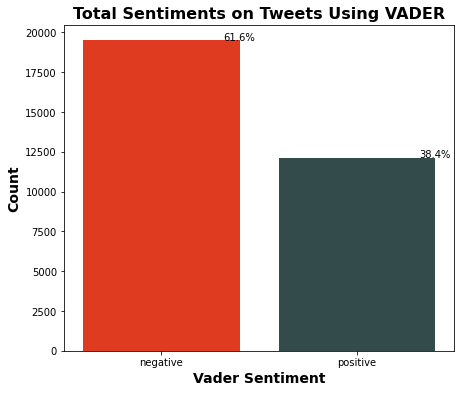

In [ ]:
plt.figure(figsize=(7,6))
ax=sns.countplot(df_agingwithbotox_tweet['vader_sentiment'],palette=['#FF2400','#2f4f4f'])
plt.grid(False)
plt.title('Total Sentiments on Tweets Using VADER',size=16,fontweight="bold")
plt.xlabel('Vader Sentiment',size=14,fontweight="bold")
plt.ylabel('Count',size=14,fontweight="bold")
total=len(df_agingwithbotox_tweet)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height() + p.get_y()
    ax.annotate(percentage, (x, y),ha='center')
plt.savefig("Vader Sentiment.jpg")
plt.show()

# **Tweets in months**



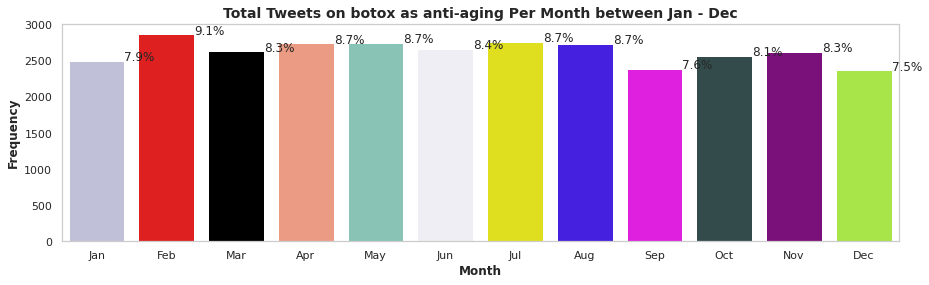

In [ ]:
plt.figure(figsize=(15, 4))
sns.set(style ='whitegrid')
ax=sns.countplot(df_agingwithbotox_tweet['month'],order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov', 'Dec']
                 ,palette=["#bcbddc",'#ff0000','#000000',"#fc9272","#7fcdbb","#efedf5",'#ffff00','#3300ff','#ff00ff','#2f4f4f','#8b008b','#adff2f'])
plt.grid(False)
plt.title('Total Tweets on botox as anti-aging Per Month between Jan - Dec',fontsize=14,fontweight='bold')
plt.xlabel('Month',size=12,fontweight="bold")
plt.ylabel('Frequency',size=12,fontweight="bold")
total=len(df_agingwithbotox_tweet)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height() + p.get_y()
    ax.annotate(percentage, (x, y))
plt.savefig("Date.jpg")
plt.show()

# ***Negative tweets vs Positive tweets for each year***


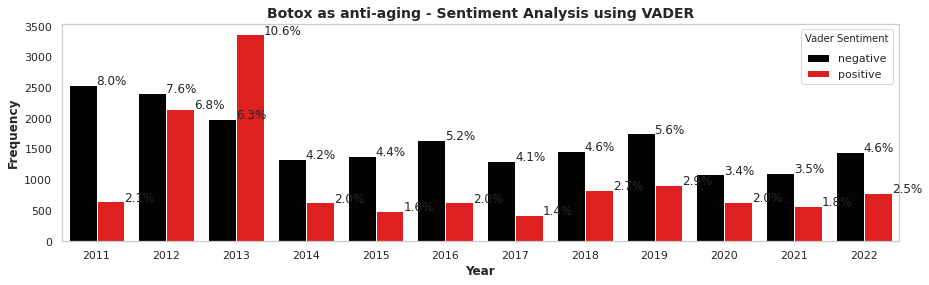

In [ ]:
plt.figure(figsize=(15,4))
ax=sns.countplot(data=df_agingwithbotox_tweet, x="year", hue="vader_sentiment",palette=['#040202','#ff0000'])
plt.grid(False)
plt.title('Botox as anti-aging - Sentiment Analysis using VADER',fontsize=14,fontweight="bold")
plt.xlabel('Year',size=12,fontweight="bold")
plt.ylabel('Frequency',size=12,fontweight="bold")
legend = plt.legend(['negative','positive'], title = "Vader Sentiment", title_fontsize = 10)
legend._legend_box.sep = 10
total=len(df_agingwithbotox_tweet)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height() + p.get_y()
    ax.annotate(percentage, (x, y))
plt.savefig("Sentiment Analysis per year.jpg")
plt.show()

# **Negative tweets vs Positive tweets within two recent each year**
(2021 and 2022)

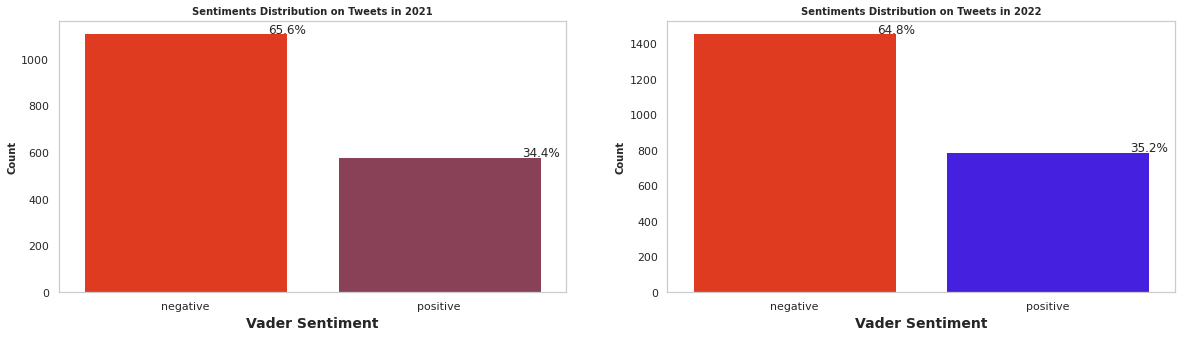

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
ax=sns.countplot(df_agingwithbotox_tweet['vader_sentiment'][df_agingwithbotox_tweet['year'] == 2021],palette=['#FF2400','#953553'],order=['negative','positive'])
plt.title('Sentiments Distribution on Tweets in 2021',size=10,fontweight="bold")
plt.xlabel('Vader Sentiment',size=14,fontweight="bold")
plt.ylabel('Count',size=10,fontweight="bold")
plt.grid(False)
total=len(df_agingwithbotox_tweet['vader_sentiment'][df_agingwithbotox_tweet['year'] == 2021])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height() + p.get_y()
    ax.annotate(percentage, (x, y),ha='center')
plt.savefig("Vader Sentiment 2021.jpg")

sns.color_palette("coolwarm", as_cmap=True)
plt.subplot(1, 2, 2)
ax=sns.countplot(df_agingwithbotox_tweet['vader_sentiment'][df_agingwithbotox_tweet['year'] == 2022],palette=['#FF2400','#3300ff'])
plt.title('Sentiments Distribution on Tweets in 2022',size=10,fontweight="bold")
plt.xlabel('Vader Sentiment',size=14,fontweight="bold")
plt.ylabel('Count',size=10,fontweight="bold")
plt.grid(False)
total=len(df_agingwithbotox_tweet['vader_sentiment'][df_agingwithbotox_tweet['year'] == 2022])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height() + p.get_y()
    ax.annotate(percentage, (x, y),ha='center')
plt.savefig("Vader Sentiment 2022.jpg")

plt.show()

# **Testing the Hypothesis of positive and negative sentiments using vader analyzer**

In [ ]:
neg=df_agingwithbotox_tweet[['year','vader_sentiment']][df_agingwithbotox_tweet['vader_sentiment']=='negative']#getting all negative tweets
pos=df_agingwithbotox_tweet[['year','vader_sentiment']][df_agingwithbotox_tweet['vader_sentiment']=='positive']#getting all positive tweets

In [ ]:
from scipy.stats import ttest_rel

stat, p = ttest_rel(neg.groupby('vader_sentiment')['vader_sentiment'].count(),pos.groupby('vader_sentiment')['vader_sentiment'].count())
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=nan, p=nan
Probably different distributions


This simply indicates that the negative sentiment and the positive sentiments do not belong to the same distrubution as there is a large disparity between them

# **Checking the percentage of tweets generated from verified users(maybe a celebrity/verified organisation)**

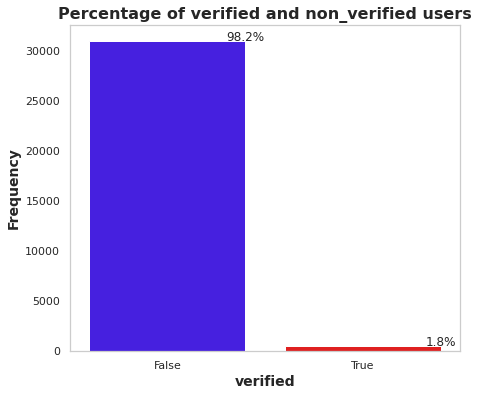

In [ ]:
plt.figure(figsize=(7,6))
ax=sns.countplot(df_agingwithbotox_tweet['verified'],palette=['#3300ff','#ff0000'])
plt.grid(False)
plt.title('Percentage of verified and non_verified users',fontsize=16,fontweight="bold")
plt.xlabel('verified',size=14,fontweight="bold")
plt.ylabel('Frequency',size=14,fontweight="bold")
total=len(df_agingwithbotox_tweet)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height() + p.get_y()
    ax.annotate(percentage, (x, y),ha='center')
plt.savefig("verified.jpg")
plt.show()

# **Commonly used words in the tweet**

In [ ]:
words_in_tweet = [tweet.lower().split() for tweet in df_agingwithbotox_tweet.cleaned_tweet]
#words_in_tweet[:5]

In [ ]:
import itertools
from collections import OrderedDict
import collections
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))
# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)
counts_no_urls.most_common(15)#top 15 most common words

[('botox', 36443),
 ('aging', 25289),
 ('the', 14347),
 ('and', 11725),
 ('to', 11289),
 ('antiaging', 10289),
 ('of', 9807),
 ('skin', 8708),
 ('a', 7455),
 ('&amp', 6984),
 ('is', 6573),
 ('for', 6413),
 ('beauty', 6187),
 ('skincare', 6049),
 ('in', 5888)]

In [ ]:
from nltk.corpus import stopwords
stopwords = set(STOPWORDS)
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('know')#adding some words to stop words
stopwords.append('us')
stopwords.append('like')
stopwords.append('also')
stopwords.append('parading')
new_tweets = [[word for word in counts_no_urls if not word in stopwords]
              for counts_no_urls in words_in_tweet]
new_tweets[0]#printing out the first items in the list

['frustrated', 'crowsfeet', 'frownlines', 'botox', 'fdaapproved', 'injectable']

In [ ]:
all_words_nsw = list(itertools.chain(*new_tweets))
counts_nsw = collections.Counter(all_words_nsw)
counts_nsw.most_common(15)

[('botox', 36443),
 ('aging', 25289),
 ('antiaging', 10289),
 ('skin', 8708),
 ('&amp', 6984),
 ('beauty', 6187),
 ('skincare', 6049),
 ('drs', 4392),
 ('beautytips', 4391),
 ('dave', 4365),
 ('dee', 4365),
 ('anti', 4269),
 ('senior', 4208),
 ('wrinkles', 2975),
 ('signs', 2704)]

#**Word cloud is used to show the most frequent used words with bigger and bolder letters/colours while the smaller size words represent the less important words**

In [ ]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


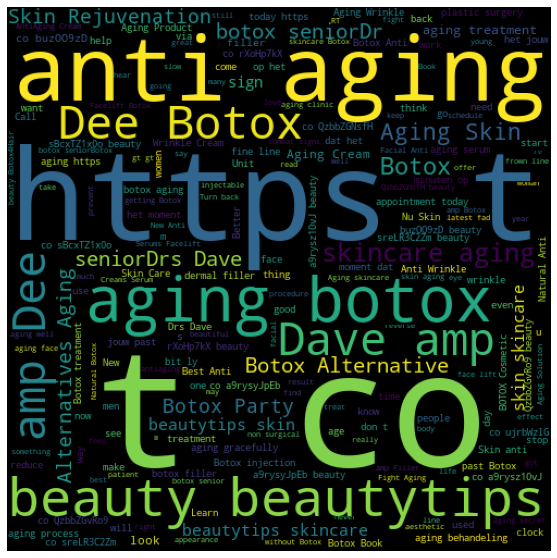

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
cleaned_tweet = "".join(twts for twts in df['Tweet'])
def plot_cloud(wordcloud):
  plt.figure(figsize=(10, 10))
  plt.imshow(wordcloud)
  plt.axis('off');
wordcloud =  WordCloud(width = 500, height =500, background_color='black', random_state=10).generate(cleaned_tweet)
plot_cloud(wordcloud)

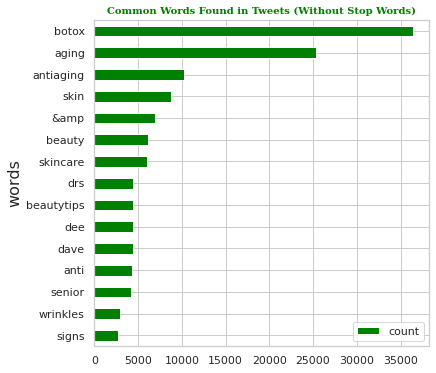

In [ ]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(6, 6))
plt.ylabel('count',fontsize=16)
# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color="green")
ax.set_title("Common Words Found in Tweets (Without Stop Words)",fontdict= {'family': 'serif','color':  'green','weight': 'bold','size': 10})
plt.savefig('most common word.jpg')
plt.show()

# ***Time Series***

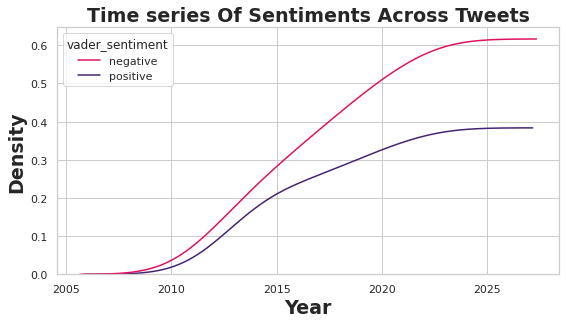

In [ ]:
plt.figure(figsize=(9, 10))
plt.subplot(2,1,2)
plt.title('Time series Of Sentiments Across Tweets',fontsize=19,fontweight='bold')
sns.kdeplot(df_agingwithbotox_tweet['year'],bw=0.5,cumulative=True,hue=df_agingwithbotox_tweet['vader_sentiment'],palette=['#E0115F','#432371'])
plt.xlabel('Year',fontsize=19,fontweight='bold')
plt.ylabel('Density',fontsize=19,fontweight='bold')
plt.savefig('time_series.jpg')
plt.show()

# **Tweet Location Cleaning and grouping**

In [ ]:
df_agingwithbotox_tweet.tail()

,cleaned_tweet,Tweet,Date,verified,Location,year,month,vader_sentiment
40706,botox and antiaging face creams,RT @alexjamison1: Botox and Anti-Aging Face Cr...,2011-01-01 08:37:58+00:00,False,nearest cinema,2011,Jan,negative
40710,botox and antiaging face creams,RT @alexjamison1: Botox and Anti-Aging Face Cr...,2011-01-01 07:32:07+00:00,False,"MI, USA",2011,Jan,negative
40713,best anti aging creams 6 reasons to turn away ...,Best Anti Aging Creams – 6 Reasons To Turn Awa...,2011-01-01 03:12:49+00:00,False,USA,2011,Jan,positive
40714,best anti aging creams 6 reasons to turn away ...,Best Anti Aging Creams – 6 Reasons To Turn Awa...,2011-01-01 03:12:49+00:00,False,New York City!,2011,Jan,positive
40715,you mean nicki fraud thats always throwing sub...,@kacymocha you mean nicki fraud that's always ...,2011-01-01 03:11:33+00:00,False,"Las Colonias, TX",2011,Jan,negative


# **Replacing unspecified locations with unknown**

In [ ]:
#filled empty columns with unknown
df_agingwithbotox_tweet['Location']=df_agingwithbotox_tweet['Location'].fillna('Unknown')

In [ ]:
df_agingwithbotox_tweet['Location'].loc[df_agingwithbotox_tweet['Location'].str.contains('United State', case=False)] = 'United State'
df_agingwithbotox_tweet['Location'].loc[df_agingwithbotox_tweet['Location'].str.contains('USA', case=False)] = 'United States'
df_agingwithbotox_tweet['Location'].loc[df_agingwithbotox_tweet['Location'].str.contains('Canada', case=False)] = 'Canada'
df_agingwithbotox_tweet['Location'].loc[df_agingwithbotox_tweet['Location'].str.contains('Washington, DC', case=False)] = 'United States'
df_agingwithbotox_tweet['Location'].loc[df_agingwithbotox_tweet['Location'].str.contains('New York, NY', case=False)] = 'United States'
df_agingwithbotox_tweet['Location'].loc[df_agingwithbotox_tweet['Location'].str.contains('Atlanta, GA', case=False)] = 'United States'
df_agingwithbotox_tweet['Location'].loc[df_agingwithbotox_tweet['Location'].str.contains('Miami, FL', case=False)] = 'United States'
df_agingwithbotox_tweet['Location'].loc[df_agingwithbotox_tweet['Location'].str.contains('Los Angeles, CA', case=False)] = 'United States'
df_agingwithbotox_tweet['Location'].loc[df_agingwithbotox_tweet['Location'].str.contains('New York', case=False)] = 'United States'
df_agingwithbotox_tweet['Location'].loc[df_agingwithbotox_tweet['Location'].str.contains('Chicago, IL', case=False)] = 'United States'
df_agingwithbotox_tweet['Location'].loc[df_agingwithbotox_tweet['Location'].str.contains('Houston, TX', case=False)] = 'United States'
df_agingwithbotox_tweet['Location'].loc[df_agingwithbotox_tweet['Location'].str.contains('London', case=False)] = 'United Kingdom'
df_agingwithbotox_tweet['Location'].loc[df_agingwithbotox_tweet['Location'].str.contains('Los Angeles', case=False)] = 'United States'
df_agingwithbotox_tweet['Location'].loc[df_agingwithbotox_tweet['Location'].str.contains('San Diego, CA', case=False)] = 'United States'
df_agingwithbotox_tweet['Location'].loc[df_agingwithbotox_tweet['Location'].str.contains('California', case=False)] = 'United States'
df_agingwithbotox_tweet['Location'].loc[df_agingwithbotox_tweet['Location'].str.contains('Knoxville, Tennessee', case=False)] = 'United States'
df_agingwithbotox_tweet['Location'].loc[df_agingwithbotox_tweet['Location'].str.contains('United States of America', case=False)] = 'United States'
df_agingwithbotox_tweet['Location'].loc[df_agingwithbotox_tweet['Location'].str.contains('107 Station Road, BR4 0PX', case=False)] = 'United Kingdom'
df_agingwithbotox_tweet['Location'].loc[df_agingwithbotox_tweet['Location'].str.contains('Maryland', case=False)] = 'United States'
df_agingwithbotox_tweet['Location'].loc[df_agingwithbotox_tweet['Location'].str.contains('Calgary, Alberta', case=False)] = 'Canada'
df_agingwithbotox_tweet['Location'].loc[df_agingwithbotox_tweet['Location'].str.contains('Toronto', case=False)] = 'Canada'
df_agingwithbotox_tweet['Location'].loc[df_agingwithbotox_tweet['Location'].str.contains('United State', case=False)] = 'United States'
df_agingwithbotox_tweet['Location'].loc[df_agingwithbotox_tweet['Location'].str.contains('NYC', case=False)] = 'United States'
df_agingwithbotox_tweet['Location'].loc[df_agingwithbotox_tweet['Location'].str.contains('US', case=False)] = 'United States'
df_agingwithbotox_tweet['Location'].loc[df_agingwithbotox_tweet['Location'].str.contains('United Kingdom', case=False)] = 'United Kingdom'
df_agingwithbotox_tweet['Location'].loc[df_agingwithbotox_tweet['Location'].str.contains('JlKaliurang km6.3 Kentungan,YK', case=False)] = 'Indonesia'
df_agingwithbotox_tweet['Location'].loc[df_agingwithbotox_tweet['Location'].str.contains('Bentonville, AR', case=False)] = 'United States'
df_agingwithbotox_tweet['Location'].loc[df_agingwithbotox_tweet['Location'].str.contains('Nederland', case=False)] = 'Netherland'
df_agingwithbotox_tweet['Location'].loc[df_agingwithbotox_tweet['Location'].str.contains('Everywhere', case=False)] = 'No Known Location'
df_agingwithbotox_tweet['Location'].loc[df_agingwithbotox_tweet['Location'].str.contains('Netherlands', case=False)] = 'Netherland'
df_agingwithbotox_tweet['Location'].loc[df_agingwithbotox_tweet['Location'].str.contains('Netherland / Poland', case=False)] = 'Netherland'

In [ ]:
#checking to see how the location column looks like that contains United States
df_agingwithbotox_tweet[df_agingwithbotox_tweet["Location"].str.contains('United States')].head()

,cleaned_tweet,Tweet,Date,verified,Location,year,month,vader_sentiment
0,frustrated with crowsfeet or frownlines botox ...,Frustrated with #CrowsFeet or #FrownLines? #Bo...,2022-11-26 23:03:57+00:00,False,United States,2022,Nov,negative
2,making facial expressions can cause dynamicwri...,Making facial expressions can cause #DynamicWr...,2022-11-26 19:06:54+00:00,False,United States,2022,Nov,negative
6,did you know botox relaxes wrinkles,Did you know #Botox relaxes wrinkles? https://...,2022-11-26 13:03:04+00:00,False,United States,2022,Nov,negative
23,when you smile frown or look puzzled you contr...,"When you smile, frown or look puzzled, you con...",2022-11-25 13:03:59+00:00,False,United States,2022,Nov,positive
25,"anti aging magic oil,stronger than botox elimi...","Anti aging magic oil,stronger than Botox, elim...",2022-11-25 07:56:28+00:00,False,United States,2022,Nov,negative


# ***checking the number of tweet from location with highest number of tweets***

In [ ]:
#checking location that appear more than 100 times
location=df_agingwithbotox_tweet.Location.value_counts()
location[location>=100]

United States                     11863
Canada                              888
United Kingdom                      838
Netherland                          498
No Known Location                   342
Indonesia                           179
Singapore                           147
Venezuela - Panama - Trinidad       104
Name: Location, dtype: int64

In [ ]:
new_df = df_agingwithbotox_tweet[df_agingwithbotox_tweet["Location"].str.contains('United States')]
new_df1 = df_agingwithbotox_tweet[df_agingwithbotox_tweet["Location"].str.contains('United Kingdom')]
new_df2 = df_agingwithbotox_tweet[df_agingwithbotox_tweet["Location"].str.contains('Canada')]
new_df3 = df_agingwithbotox_tweet[df_agingwithbotox_tweet["Location"].str.contains('Netherland')]
new_df4 = df_agingwithbotox_tweet[df_agingwithbotox_tweet["Location"].str.contains('No Known Location')]


In [ ]:
new_df['Location'].unique().tolist(),new_df1['Location'].unique().tolist(),new_df2['Location'].unique().tolist(),new_df3['Location'].unique().tolist(),new_df4['Location'].unique().tolist()


(['United States'],
 ['United Kingdom'],
 ['Canada'],
 ['Netherland'],
 ['No Known Location'])

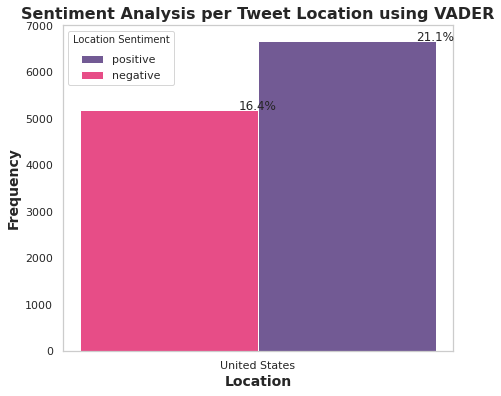

In [ ]:
plt.figure(figsize=(7,6))
ax=sns.histplot(data=new_df, x="Location",hue='vader_sentiment',multiple='dodge', shrink=0.6, binwidth = 0.9,palette=['#E0115F','#432371'])
plt.grid(False)
plt.title('Sentiment Analysis per Tweet Location using VADER',fontsize=16,fontweight="bold")
plt.xlabel('Location',size=14,fontweight="bold")
plt.ylabel('Frequency',size=14,fontweight="bold")
total = len(df_agingwithbotox_tweet['Location'])
legend = plt.legend(['positive','negative'], title = "Location Sentiment", title_fontsize = 10)
legend._legend_box.sep = 10
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height() + p.get_y()
    ax.annotate(percentage, (x, y),ha='center')
plt.savefig("Tweet Location Vader.jpg")
plt.show()




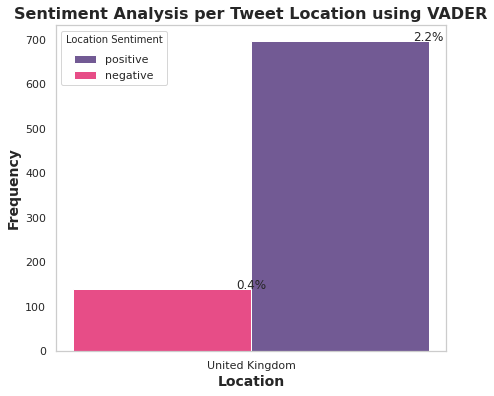

In [ ]:
plt.figure(figsize=(7,6))
ax=sns.histplot(data=new_df1, x="Location",hue='vader_sentiment',multiple='dodge', shrink=0.6, binwidth = 0.9,palette=['#E0115F','#432371'])
plt.grid(False)
plt.title('Sentiment Analysis per Tweet Location using VADER',fontsize=16,fontweight="bold")
plt.xlabel('Location',size=14,fontweight="bold")
plt.ylabel('Frequency',size=14,fontweight="bold")
total = len(df_agingwithbotox_tweet['Location'])
legend = plt.legend(['positive','negative'], title = "Location Sentiment", title_fontsize = 10)
legend._legend_box.sep = 10
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height() + p.get_y()
    ax.annotate(percentage, (x, y),ha='center')
plt.savefig("Tweet Location Vader.jpg")
plt.show()

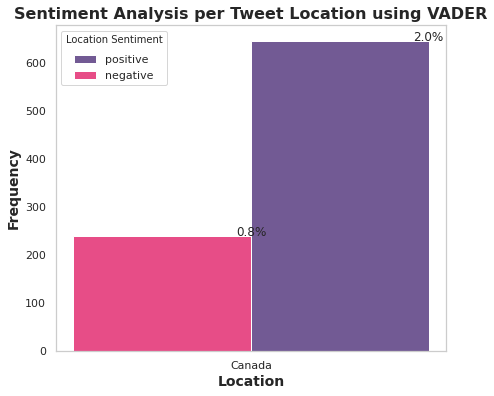

In [ ]:
plt.figure(figsize=(7,6))
ax=sns.histplot(data=new_df2, x="Location",hue='vader_sentiment',multiple='dodge', shrink=0.6, binwidth = 0.4,palette=['#E0115F','#432371'])
plt.grid(False)
plt.title('Sentiment Analysis per Tweet Location using VADER',fontsize=16,fontweight="bold")
plt.xlabel('Location',size=14,fontweight="bold")
plt.ylabel('Frequency',size=14,fontweight="bold")
total = len(df_agingwithbotox_tweet['Location'])
legend = plt.legend(['positive','negative'], title = "Location Sentiment", title_fontsize = 10)
legend._legend_box.sep = 10
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height() + p.get_y()
    ax.annotate(percentage, (x, y),ha='center')
plt.savefig("Tweet Location Vader.jpg")
plt.show()

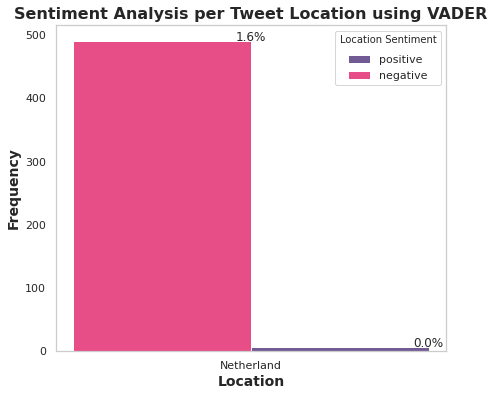

In [ ]:
plt.figure(figsize=(7,6))
ax=sns.histplot(data=new_df3, x="Location",hue='vader_sentiment',multiple='dodge', shrink=0.6, binwidth = 0.4,palette=['#E0115F','#432371'])
plt.grid(False)
plt.title('Sentiment Analysis per Tweet Location using VADER',fontsize=16,fontweight="bold")
plt.xlabel('Location',size=14,fontweight="bold")
plt.ylabel('Frequency',size=14,fontweight="bold")
total = len(df_agingwithbotox_tweet['Location'])
legend = plt.legend(['positive','negative'], title = "Location Sentiment", title_fontsize = 10)
legend._legend_box.sep = 10
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height() + p.get_y()
    ax.annotate(percentage, (x, y),ha='center')
plt.savefig("Tweet Location Vader.jpg")
plt.show()

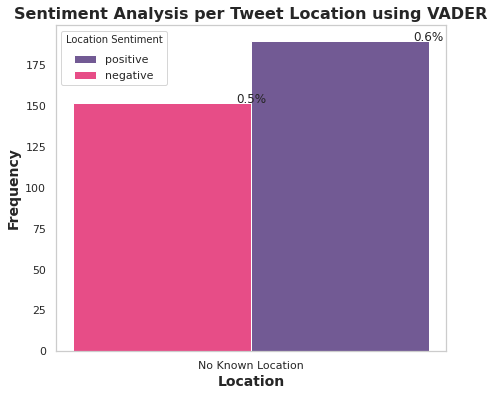

In [ ]:
plt.figure(figsize=(7,6))
ax=sns.histplot(data=new_df4, x="Location",hue='vader_sentiment',multiple='dodge', shrink=0.6, binwidth = 0.4,palette=['#E0115F','#432371'])
plt.grid(False)
plt.title('Sentiment Analysis per Tweet Location using VADER',fontsize=16,fontweight="bold")
plt.xlabel('Location',size=14,fontweight="bold")
plt.ylabel('Frequency',size=14,fontweight="bold")
total = len(df_agingwithbotox_tweet['Location'])
legend = plt.legend(['positive','negative'], title = "Location Sentiment", title_fontsize = 10)
legend._legend_box.sep = 10
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height() + p.get_y()
    ax.annotate(percentage, (x, y),ha='center')
plt.savefig("Tweet Location Vader.jpg")
plt.show()

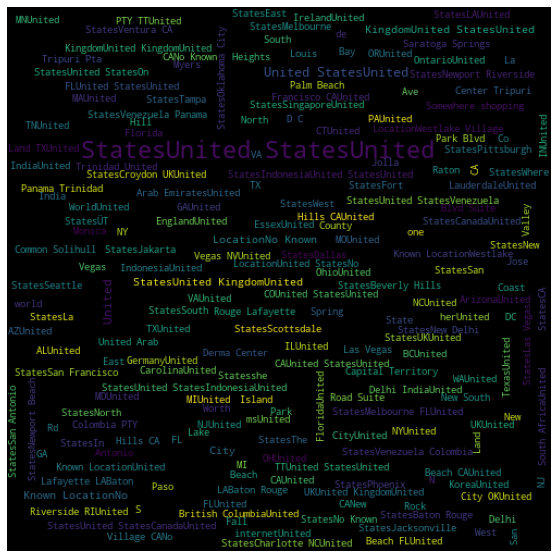

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
Location = "".join(twts for twts in df_agingwithbotox_tweet['Location'])
def plot_cloud(wordcloud):
  plt.figure(figsize=(10, 10))
  plt.imshow(wordcloud)
  plt.axis('off');
wordcloud =  WordCloud(width = 500, height =500, background_color='black', random_state=10).generate(Location)
plot_cloud(wordcloud)